# 0. 시작하기전에

책 *김태영, 블록과 함께하는 파이썬 딥러닝 케라스, 디지털북스, 2017* 을 읽고 (복습을 위해)마음대로 정리한 것입니다. 설명이 많이 부족하니 자세한 내용은 책이나 저자의 [블로그](https://tykimos.github.io/)를 참고하세요. 

# 1. 케라스(Keras)

케라스는 Theano와 TensorFlow를 백엔드(back-end)로 사용하는 딥러닝 라이브러리로서 Torch에서 영감을 얻어 직관적 API를 제공합니다. 창시자는 Google의 소프트웨어 엔지니어인 Francois Chollet입니다.

- 직관적 API
- Theano, TensorFlow가 백엔드
- 빠르게 성장하고 있는 프레임워크

## 1.1 케라스의 기본개념

케라스로 딥러닝모델을 만들 때는 다음과 같은 순서로 작성합니다.

1. 데이터 불러오고 전처리
2. 모델을 구성하기
3. 모델 학습과 평가하기
4. 모델로 예측하기


# 2. 레이어
케라스에서 사용되는 레이어는 층층이 쌓아서 모델을 만드는 개념입니다. 

## 2.1 인공 신경망
케라스에서는 `Dense`라는 클래스로 구현이 되어 있습니다. 아래와 같이 사용하죠.
``` python
Dense(8, input_dim = 4, activation = 'relu')
```
- 첫번째 인자 : 출력 뉴런의 수
- input_dim : 입력 뉴런의 수, 입력층에서만 사용
- activation : 활성화 함수
    + linear(default 값): 계산된 값이 그대로 출력
    + sigmoid : 이진 분류 문제에 주로 사용
    + relu : 은닉층에 주로 사용
    + softmax : 출력층에 주로 사용
    
## 2.2 레이어 쌓기
4개의 입력값을 받아 이진 분류하는 모델은 다음과 같습니다.
```python
model = Sequential()
model.add(Dense(8, input_dim = 4, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
```

## 2.3 다층 퍼셉트론 신경망 모델
간단한 다층 퍼셉트론 신경망 모델로 이진 분류를 해보겠습니다. 예제로 사용할 데이터는 [Pima 인디언의 당뇨병 발병 데이터](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 입니다.

### 1) 데이터 준비하기
이제 ics.uci.edu 에서는 더이상 제공되지 않습니다. 그래서 저는 Kaggle에서 **diabetes.csv** 파일을 다운로드 했습니다. 간략하게 파일을 살펴보면 다음과 같습니다.
- 인스턴스의 수 : 768개
- 속성의 수 : 8 (자세한것은 생략)
- 클래스의 수 : 2 (당뇨병 유/무)

`pandas`로 데이터의 모양을 살펴보겠습니다.

In [1]:
import pandas as pd
df = pd.read_csv('../diabetes.csv')
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 2) 데이터 전처리
데이터를 불러오기 앞서, 랜덤 시드를 명시적으로 정합니다. 이것을 하지 않으면 실행할 때마다 다른 결과가 나오므로 파라미터 조정시에는 고정해 주는것이 좋습니다.

In [2]:
import numpy as np
np.random.seed(5) # 랜덤시드 고정시키기
# 다운받은 파일이 같은 폴더에 있다고 가정합니다.
dataset = np.genfromtxt('../diabetes.csv', delimiter=',')
# 데이터를 학습용과 검증용으로 나눕니다.
x_train = dataset[1:700, 0:8] # 700개는 학습용으로 68개는 검증용으로 쓰겠습니다
y_train = dataset[1:700, 8]
x_test = dataset[700:, 0:8] 
y_test = dataset[700:, 8]
x_train # 데이터를 확인해봅니다.

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   3.   ,  169.   ,   74.   , ...,   29.9  ,    0.268,   31.   ],
       [   0.   ,   99.   ,    0.   , ...,   25.   ,    0.253,   22.   ],
       [   4.   ,  127.   ,   88.   , ...,   34.5  ,    0.598,   28.   ]])

### 3) 모델 구성하기

Dense 레이어만을 사용하여 다층 퍼셉트론 신경망 모델을 만들겠습니다.
- 첫번째 레이어는 은닉층으로 8개의 속성을 입력받아 12개로 출력합니다.
- 두번째 레이어는 은닉층으로 12개의 뉴런을 입력받아 8개로 출력합니다.
- 마지막 레이어는 출력 레이어로 8개의 뉴런을 입력받아 1개의 뉴런을 출력합니다.
  
은닉층은 *relu* 함수를 사용하고 출력층은 *sigmoid* 함수를 사용하겠습니다.  

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# 모델 만들기
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
# 모델 학습과정 설정
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
# loss : 평가에 사용된 손실 함수입니다. 이진 분류에서는 binary_crossentropy를 사용합니다
# optimizer : 최적 파라미터를 찾는 알고리즘으로 경사 하강법의 하나인 adam을 사용합니다.
# metrics : 평가척도, 분류문제에서는 보통 accuracy를 씁니다.

Using TensorFlow backend.


### 4) 학습과 평가
먼저 `fit()` 기능을 사용해 모델을 학습시킵니다. 필요한 설정은 다음과 같습니다.
- 첫번째 인자 : 입력 변수, 여기서는 8가지 속성입니다.
- 두번째 인자 : 출력 변수, 여기서는 당뇨병 유/무 입니다.
- batch_size : 가중치를 업데이트할 배치 크기
- verbose : 학습과정 표시여부, 보고 싶다면 1

시험셋을 이용해 학습한 모델을 평가하겠습니다. `evaluate()` 기능을 이용해 간단히 수행할 수 있습니다.

In [4]:
hist =  model.fit(x_train, y_train, epochs = 200, batch_size = 64, verbose=0)
# 모델 평가하기
score = model.evaluate(x_test,y_test)
print('정확도는 {}% 입니다.'.format(score[1]*100))

69/69 [==============================] - 0s 306us/step
정확도는 73.91304365102795% 입니다.


## 2.4 히스토리 기능
히스토리 기능은 케라스에 기본으로 탑재되어 있습니다. 별도의 설정없이 아래와 같이 사용할 수 있습니다.


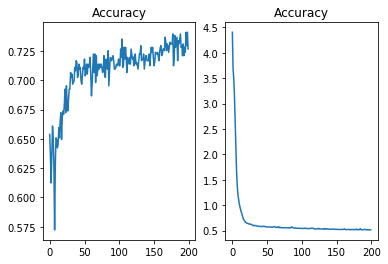

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,(ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = False)
ax0.plot(hist.history["acc"], label = 'acc')
ax0.set(title='Accuracy')
ax1.plot(hist.history["loss"], label = 'loss')
ax1.set(title='Accuracy')

## 3. 합성곱(convolution) 신경망 레이어
케라스에서 제공하는 합성곱 레이어 중 영상처리에 주로 사용되는 `Conv2D` 레이어를 살펴 보겠습니다. 아래는 사용 예제 입니다.

```python
Conv2D(1, (2, 2), padding = 'valid', input_shape = (4, 4, 1), activation = 'relu')
                                                   
```
- 첫번째 인자: 합성곱 필터의 숫자
- 두번째 인자: 합성곱 커널의 (행,열)
- padding : 경계 처리 방법
    + valid : 출력사이즈는 입력 사이즈보다 작아집니다.
    + same : 출력 이미지 사이즈와 입력 사이즈가 동일합니다.
- input_shape : 입력형태, (행, 열, 채널 수); 채널은 흑백이면 1, 컬러면 3입니다.
- activation : 활성화 함수를 설정

사소한 변화를 무시하는 Max Pooling 레이어
1차원으로 바꾸는 Flatten 레이어

## 3.1 합성곱(convolution) 신경망 모델 만들기
이미지 기반의 분류에는 합성곱 신경맘 모델이 적합합니다. 여기서 우리는 이미지파일의 분류를 해보도록 하겠습니다.

### 1)  데이터 준비하기
[저자의 블로그](http://tykimos.github.io) 에서 제공하고 있는 데이터를 가지고 살펴 보겠습니다. 
원, 사각형, 삼각형 데이터셋을 예제로 살펴보겠습니다. 구성은 훈련셋과 시험셋으로 되어 있습니다.  
아래 그림은 훈련셋입니다.  

![훈련 데이터](http://tykimos.github.io/warehouse/2017-3-8-CNN_Data_Augmentation_1.png)
<center> Figure from tykimos.github.io </center>
  
다음은 시험용 데이터입니다.
![시험 데이터](http://tykimos.github.io/warehouse/2017-3-8-CNN_Data_Augmentation_3.png)
<center> Figure from tykimos.github.io </center>


### 2) 데이터 전처리
수정된 전체 코드는 다음과 같습니다. 참고로 시험셋은 데이터 부풀리기를 할 필요가 없으니, test_datagen 객체 생성 시에는 별도의 파라미터를 추가하지 않았습니다. 그리고 fit_generator함수에서 steps_per_epoch의 값은 기존 15개에서 더 많은 수 (현재 예는 1500개)로 설정합니다.  
batch_size * steps_per_epoch가 전체 샘플 수 인데, 데이터 부풀리기를 하지 않을 때는 기존의 15개의 배치사이즈(3개)로 전체 45개를 모두 학습에 사용할 수 있지만, ImageDataGenerator함수를 통해 데이터 부풀리기는 할 때는 하나의 샘플로 여러 개의 결과를 얻기 때문에 요청하는 데로 무한의 샘플이 제공됩니다.  
여기서는 100배 정도인 1500개로 설정했습니다.

In [6]:
# 필요한 라이브러리 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
# 랜덤시드 고정시키기
np.random.seed(5)
# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        '../hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '../hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


### 3) 모델 학습및 평가하기

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed") 
# numpy로인한 경고 무시

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch=1000,
        epochs=20, validation_data=test_generator, validation_steps=5, verbose = 0)

# 모델 평가하기
scores = model.evaluate_generator(test_generator,steps = 5)
print("예측의 정확도는 {} % 입니다.".format(scores[1]*100))

### 4) 모델로 예측하기

In [7]:
# 모델 예측하기
print("-- 예측 --")
output = model.predict_generator(test_generator, steps = 5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(output)

예측의 정확도는 73.33333373069763 % 입니다.


도형을 분류하는 간단한 문제에서 데이터 부풀리기 방법에 대하여 알아보았고, 각 파라미터 별로 어떻게 데이터가 부풀어지는지 살펴보았습니다.
> 데이터 부풀리기 방법은 학습용 데이터가 충분하지 않을때 성능 개선에 큰 도움을 줍니다.


## 4. 순환 신경망 모델 RNN (Recurrent Neural Network)

순환 신경망 모델은 순차적인 자료에서 규칙을 찾습니다. 케라스에서 제공하는 순환 신경망 레이어중 가장 흔히 쓰이는 LSTM(Long Short-Term Memory units) 레이어를 알아보겠습니다. 

### LSTM 레이어

사용법은 Dense 레이어와 비슷하지만, 시퀀스 출력여부와 상태 유지 설정으로 다양한 형태로 구성할 수 있습니다.

```python
LSTM(3, input_dim= 1, input_length=4)
```

-  첫번째 인자:
- input_dim
- input_length:

## 4.1 순환 신경망 모델 만들기
앞서 살펴본 LSTM 레이어를 사용해 순환 신경망 모델을 만들어 보겠습니다.

### 1) 데이터 준비

준비한 데이터는 사람의 Y염색체 DNA서열중 반복서열이 있는 조각입니다. 서열은 아래와 같습니다.
  
    AGATAGACAGATTAGATGATAGGGAGATGATACATAGAAGGTAGATAGA
    TAGATAGATAGATAGATAGATAGATAGATAGATAGATAATACATAGATA
    ATTAATGGATAGATATATAGA
    
약 87%의 정확도로 AGAT가 반복됩니다. 길이는 약 30번 반복이고요.  
    
DNA 서열 처럼 문자로 구성되어 있는 것은 모델 입출력으로 사용할 수 없기 때문에 각각을 를 숫자로 변환할 수 있는 사전을 하나 만들어봅니다.  
첫번째 사전은 DNA를 숫자로, 두번째 사전은 숫자를 DNA로 만들어 줍니다.


In [22]:
# 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 코드 사전 정의
code2idx = {'A':0, 'C':1, 'T':2, 'G':3}
idx2code = {0:'A', 1:'C', 2:'T', 3:'G'}

이제 DNA 서열을 가지고 학습용 데이터로 만들어 보겠습니다.

In [23]:
# 2. 데이터셋 생성하기
seq = list('AGATAGACAGATTAGATGATAGGGAGATGATACATAGAAGG\
TAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAATACATA\
GATAATTAATGGATAGATATATAGA')

# 데이터셋 생성 함수   
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset[:4]) # 앞쪽 4개만 확인하기

(115, 5)
[[0 3 0 2 0]
 [3 0 2 0 3]
 [0 2 0 3 0]
 [2 0 3 0 1]]


DNA 서열을 5개씩 자르고 각각에 DNA를 숫자로 변환했습니다.

### 2) 데이터 전처리하기

In [24]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (115, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  4


### 3) 모델 학습 및 평가하기

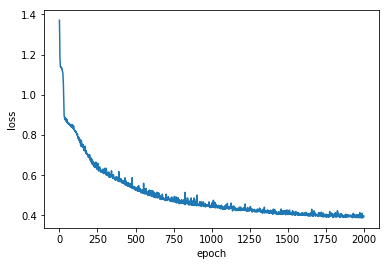

115/115 [==============================] - 0s 810us/step
정확도는 87.82608742299287 % 입니다.


In [25]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, callbacks=[history], 
          verbose = 0)

# 6. 학습과정 시각화
plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("정확도는 {} % 입니다.".format(scores[1]*100))

# 8. 모델 사용하기
pred_count = 115 # 최대 예측 개수 정의

### 4) 모델로 예측하기

In [26]:
# 한 구절만 예측
# AGAT
seq_out = ['A', 'G', 'A', 'T']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 서열이므로 인덱스 값을 코드로 변환하여 저장
    
print("조각씩 서열 예측하기  : ", ''.join(seq_out))

조각씩 서열 예측하기  :  AGATAGATAGATAAGATAATAGAGAGATAATAGATAGATGGTAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGTGCATAGATAGTGAGTGGATAGATAGAGAGA


In [27]:
# 곡 전체 예측

seq_in = ['A', 'G', 'A', 'T']
seq_out = seq_in
# 코드를 인덱스값으로 변환
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] 

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("한번에 서열 예측하기: ", ''.join(seq_out))

한번에 서열 예측하기:  AGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGA


### 예측결과 확인

Sequence alignment 한 결과는 다음과 같습니다.

    Original       AGATAGACAGATTAGATGATAGGGAGATGATACATAGAAGGTAGATAGATAGATAGATAG	60
    step-wise      AGATAGATGGATAAGATAATAGAGAGATAATAGATAGATGGTAGATAGATAGATAGATAG	60
    whole          AGATAGATAGATAGATAGATAGATAGAT--AGATAGATAGATAGATAGATAGATAGATAG	58
                   *******  ***      ****  ****           * *******************

    Original       ATAGATAGATAGATAGATAGATAGATAATACATAGATAATT--AATGGATAGATATATAG	118
    step-wise      ATAGATAGATAGATAGATAGATAGATAGTACATAGATAGTA--AGTAAATAGATAGATAT	118
    whole          ATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAGATAG	118
                   ***************************                  *  ******* *** 

    Original       A	119
    step-wise      A	119
    whole          A	119
                   *

조각조각 예측하는 방법이 전체를 한번에 예측하는 것 보다는 정확한 것을 알 수 있습니다.


# 5. 상태유지 LSTM 모델
이번에는 상태유지(Stateful) LSTM 모델에 대해서 알아보겠습니다. 여기서 상태유지라는 것은 현재 학습된 상태가 다음 학습 시 초기 상태로 전달된다는 것을 의미합니다
> 상태 유지 모드에서는 현재 샘플의 학습 상태가 다음 샘플의 초기 상태

긴 시퀀스 데이터를 처리할 때 권장됩니다. 
LSTM 레이어 생성시 다음과 같이 처리하면 됩니다. 
```python
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful = True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
```

## 5.1 상태유지 순환 신경망 RNN 모델 만들기

### 1) 데이터 준비
시간의 흐름에 따라 진폭이 -1 에서 1사이로 변하는 코사인 데이터를 만들어 보겠습니다. 이러한 데이터를 시계열 수치라고 하죠.


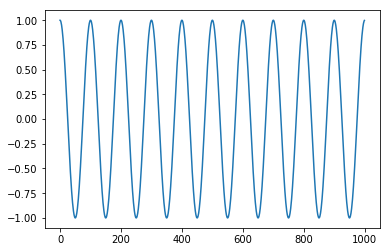

In [55]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
plt.plot(np.arange(1000), signal_data) # 생성한 데이터 시각화

### 2) 데이터 전처리
데이터를 모델에 학습시키기 위해서 전처리가 필요합니다.

In [56]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

look_back = 40

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:700]
val = signal_data[600:700]
test = signal_data[700:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### 3) 모델 학습과 평가

시계열 수치를 입력받아 예측하기 위해 상태 유지 다층 순환신경망 모델을 사용하겠습니다. 코드는 아래와 같습니다.

> 학습 시간이 아주 오래걸리니 주의하세요.

In [57]:
# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, 
                   return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for i in range(50):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, 
              callbacks=[custom_hist], validation_data=(x_val, y_val), verbose= 0)
    model.reset_states()

학습과정을 시각화해보도록 하겠습니다.

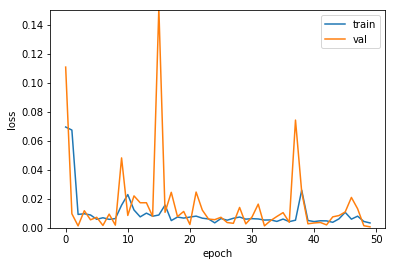

In [58]:
# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

모델이 얼마나 정확한지 확인하겠습니다.

In [59]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  0.00237784640335
Validataion Score:  0.000651868844193
Test Score:  0.00211231139425



### 4) 모델로 예측하기
모델을 가지고 코사인 곡선이 그려지는지 예측해보겠습니다. 그리고 원본과 겹쳐서 시각화해보겠습니다.

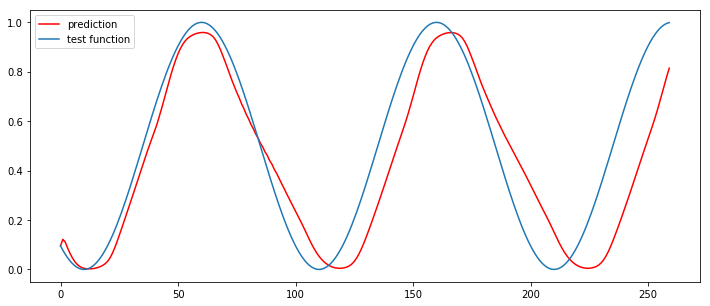

In [61]:
# 7. 모델 사용하기
look_ahead = 260
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

그림에서 볼 수 있듯이 진폭과 주기가 유사한 형태의 결과를 얻었습니다. 상태유지 모드에서는 보통 배치 사이즈를 1로 설정합니다. 하지만 서로 성격이 다른 시계열 자료가 있다면 갯수를 추가해야 합니다. 예를 들어 주식 3종목을 학습한다면 배치 사이즈는 3이 되어야 합니다.

# 마치며

딥러닝 라이브러리 케라스에 대해 알아 보았습니다. 케라스는 너무나도 편리합니다. 짧은 코드로 다양한 딥러닝 모델(다층 퍼셉트론, 합성곱 신경망, 순환 신경망등)을 쉽게 생성하고 테스트 해볼수 있죠.  

진짜 문제는 어느 상황에 어떠한 모델을 쓰고 적절한 파라미터 값은 무엇인지 아는 것입니다. 이것은 좀 더 많은 경험과 공부가 필요 할 것 같습니다.